In [79]:
import numpy as np

from dask import delayed
import time

In [24]:
def word_count(word_list, s):
    counts = {w:0 for w in word_list}
    for w in s.strip().split():
        if w in counts:
            counts[w] += 1
    time.sleep(0.5)
    return counts

def combine_counts(count_dicts):
    counts = {}
    for cd in count_dicts:
        for w,c in cd.items():
            if w not in counts:
                counts[w] = 0
            counts[w] += c
    time.sleep(0.5)
    return counts

In [25]:
strs = [
    'the quick brown fox jumps over the lazy dog',
    'the the the',
    'fox bennett marsh',
    'blah lazy',
]
words = ['the', 'fox', 'quick', 'bennett']

In [26]:
%%time

count_dicts = []
for s in strs:
    count_dicts.append(word_count(words, s))
counts = combine_counts(count_dicts)
counts

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 2.5 s


{'the': 5, 'fox': 2, 'quick': 1, 'bennett': 1}

In [30]:
%%time

count_dicts = []
for s in strs:
    count_dicts.append(delayed(word_count)(words, s))
counts = delayed(combine_counts)(count_dicts)
counts.compute(scheduler='threads')

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.01 s


{'the': 5, 'fox': 2, 'quick': 1, 'bennett': 1}

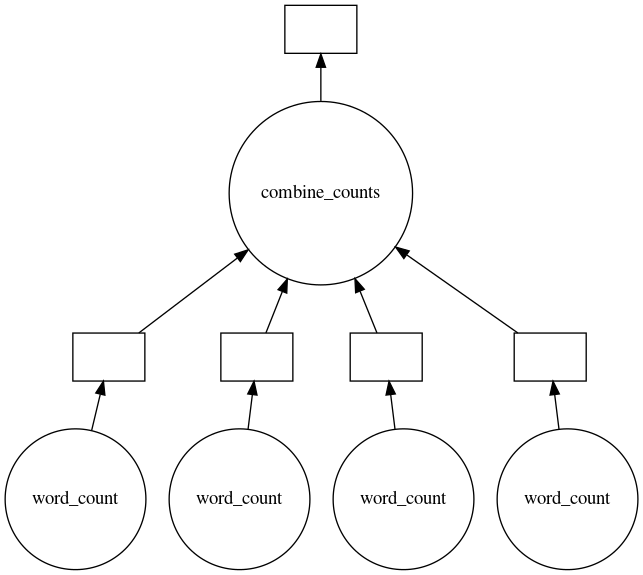

In [31]:
counts.visualize()

In [84]:
def merge(l1,l2):
    merged = []
    i1, i2 = 0, 0
    while i1 < len(l1) or i2 < len(l2):
        if i1 < len(l1):
            if i2 == len(l2) or l1[i1] < l2[i2]:
                merged.append(l1[i1])
                i1 += 1
            else:
                merged.append(l2[i2])
                i2 += 1
        else:
            merged.append(l2[i2])
            i2 += 1
    time.sleep(0.2)
    return merged


def merge_all(lists):
    if len(lists)==1:
        return lists[0]
    i = len(lists)//2
    return merge(merge_all(lists[:i]), merge_all(lists[i:]))

def construct_merge_graph(lists):
        
    if len(lists) == 1:
        return lists[0]
    
    i = len(lists)//2
    return delayed(merge)(construct_merge_graph(lists[:i]),
                          construct_merge_graph(lists[i:])
                         )

def is_sorted(vals):
    for i in range(len(vals)-1):
        if vals[i+1] < vals[i]:
            return False
    return True

In [97]:
lists = [np.random.randint(1000, size=5).tolist() for _ in range(40)]

In [98]:
%%time
merged = merge_all([sorted(x) for x in lists])
assert is_sorted(merged)

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 7.81 s


In [99]:
%%time
merged = construct_merge_graph([delayed(sorted)(x) for x in lists])
assert is_sorted(merged.compute())

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 2.62 s


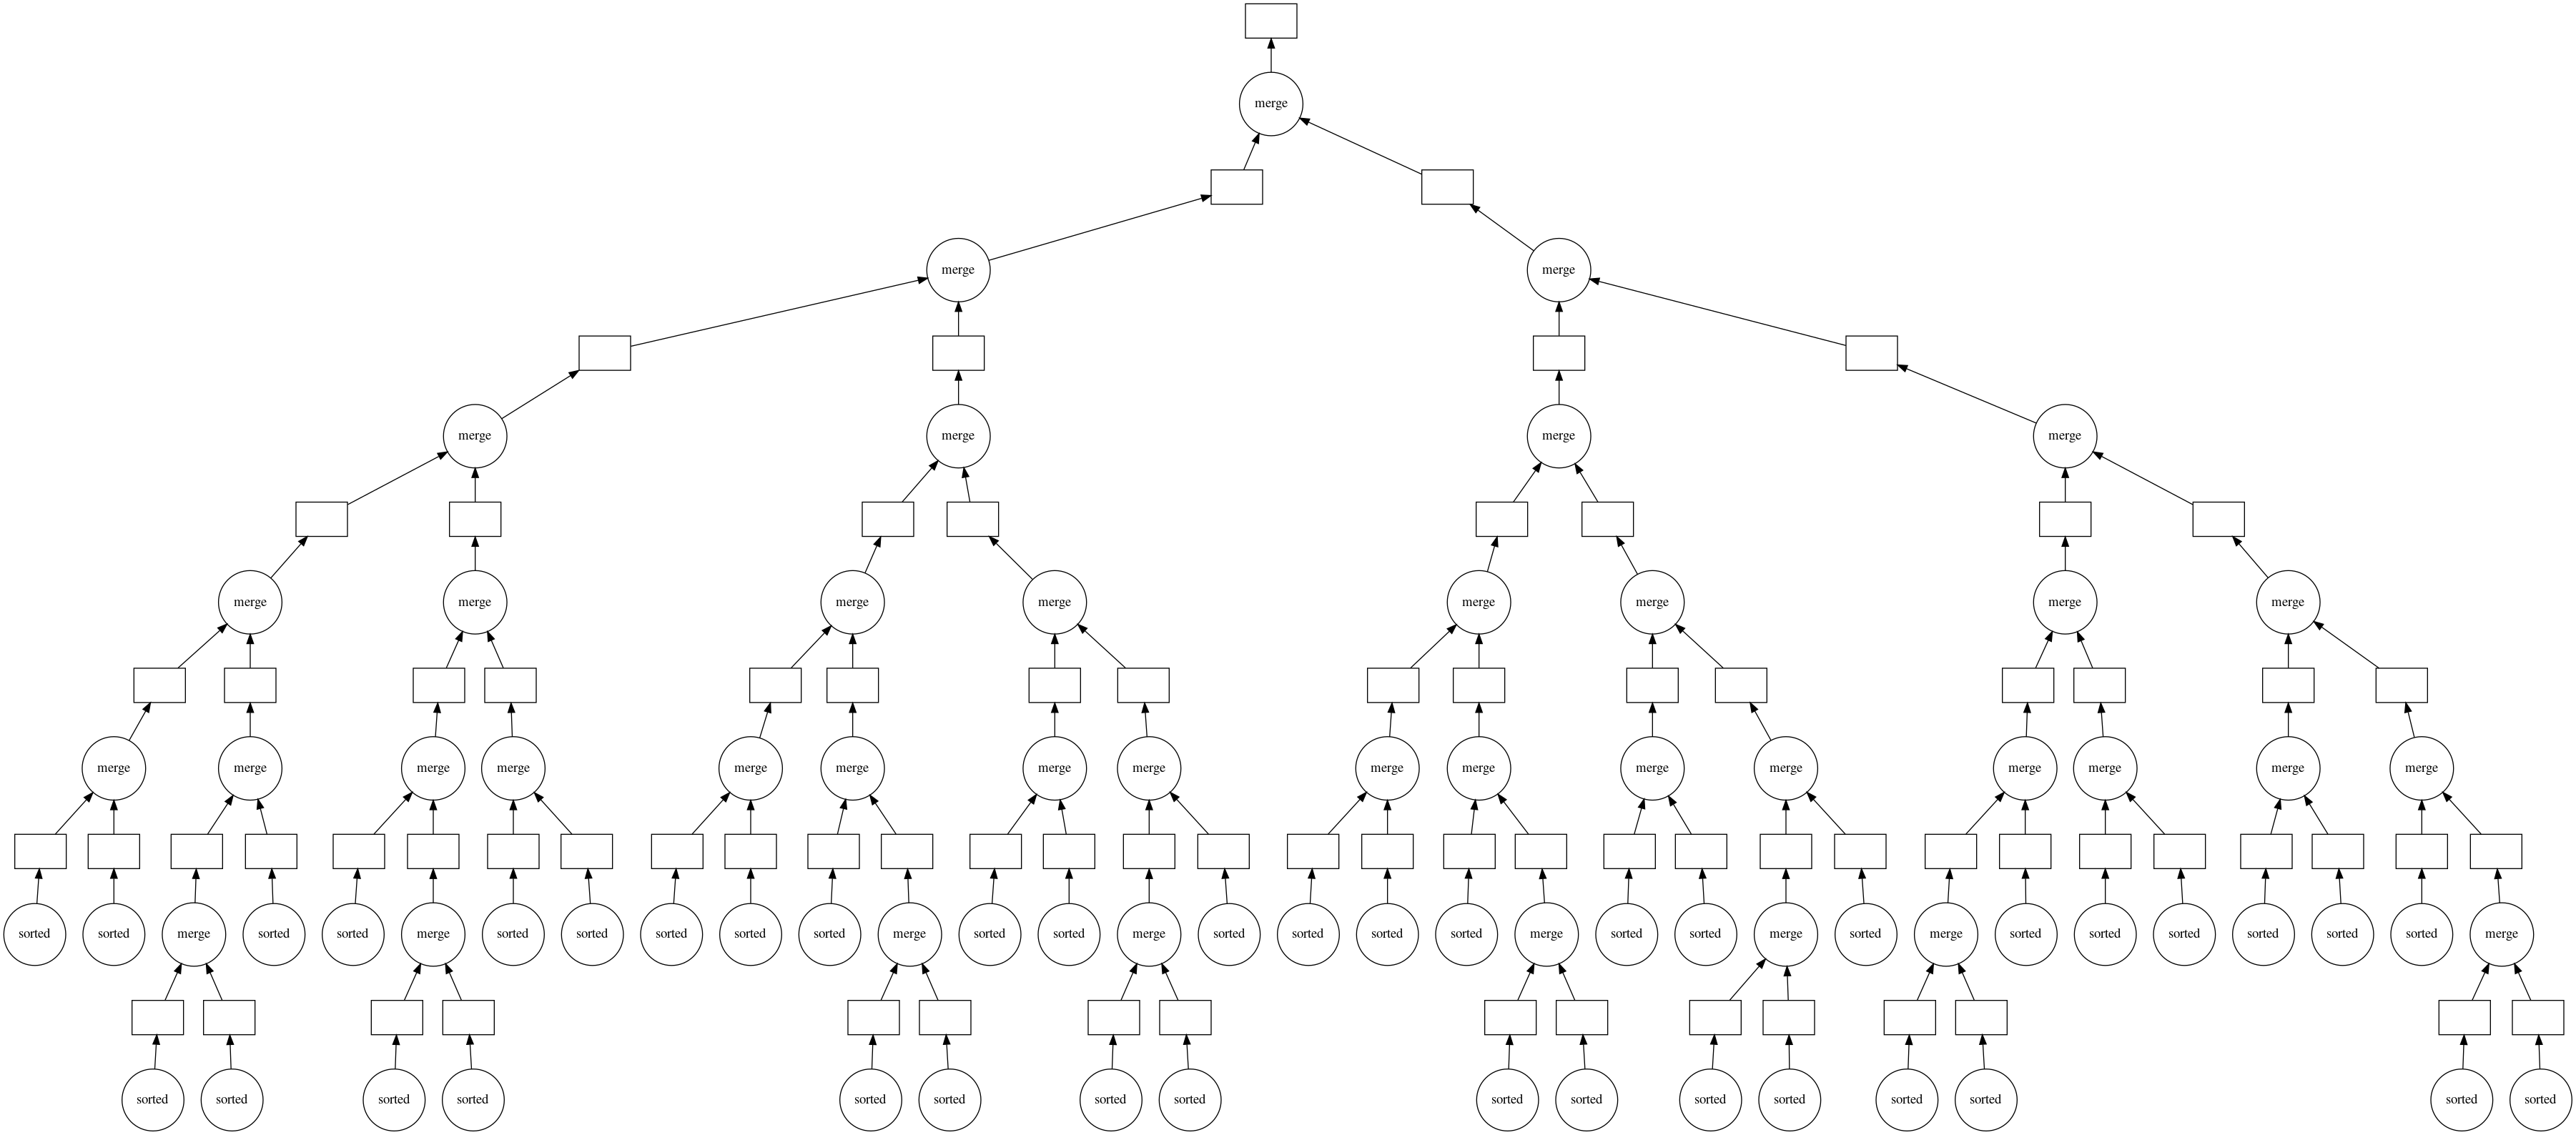

In [100]:
merged.visualize()